## Lectura y gráfica de una Señal

### Importación de librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

##### Abrir archivo txt

In [31]:
f = open("SenalEMG/Tomo1_victor_biceps.txt","r")
raw_data = f.readlines()[3] # con f.read() leemos todo el contenido
f.close()

raw_data

'0\t0\t0\t0\t0\t515\t\n'

In [21]:
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)

['100', '128', '202', '503']


In [27]:
Fs = float(x[0])
Fs = Fs * 10
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000.0 hz
 Ts=0.001 s


## Leer archivo excluyendo 2 primeras filas

In [36]:
array = np.genfromtxt("SenalEMG/Tomo1_victor_biceps.txt", delimiter="\t",skip_header = 3)

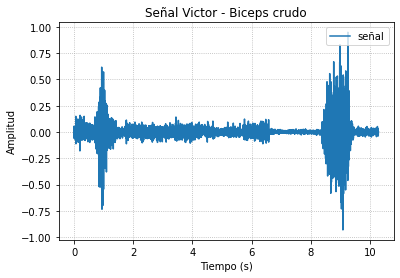

In [42]:
bits = 10
voltaje_ref = 3.3
y = (array[ :, 5]) * voltaje_ref /(2**bits)
y = y - np.mean(y)
t = np.arange(0,len(y) * Ts, Ts)
plt.plot(t, y, label="señal")  
plt.title("Señal Victor - Biceps crudo")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.show()